<a href="https://colab.research.google.com/github/YoheiFukuhara/OpenCV-Python-Tutorials/blob/master/Keras09_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以下の記事参照
- [超簡単 Kerasで複数Input統合モデル
](https://qiita.com/FukuharaYohei/items/58cfbce0ed81833a2da1)
- [Kerasで複数の入力を統合/マージする方法](https://urusulambda.wordpress.com/2018/03/04/keras%E3%81%A7%E8%A4%87%E6%95%B0%E3%81%AE%E5%85%A5%E5%8A%9B%E3%82%92%E7%B5%B1%E5%90%88-%E3%83%9E%E3%83%BC%E3%82%B8%E3%81%99%E3%82%8B%E6%96%B9%E6%B3%95/)

In [0]:
from random import random

import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, concatenate, Dense
from tensorflow.keras.models import Model
from tensorflow.python.keras.utils.vis_utils import plot_model
import numpy as np

# 前処理

In [0]:
NUM_TRAIN = 256

x_train1 = np.empty((0, 1)) # 入力(説明変数)1
x_train2 = np.empty((0, 1)) # 入力(説明変数)2
y_train = np.empty((0, 1)) # 正解ラベル(目的変数)

入力と正解ラベルの関係性

- 入力1と入力2の和が1未満の場合は、正解ラベルを0
- 入力1と入力2の和が1以上の場合は、正解ラベルを1


In [0]:
for i in range(NUM_TRAIN):
    x1 = np.array(random()) # 0から1までの乱数
    x2 = np.array(random()) # 0から1までの乱数
    if x1 + x2 < 1:
        y_train = np.append(y_train, np.zeros(1).reshape(1, 1), axis=0)
    else:
        y_train = np.append(y_train, np.ones(1).reshape(1, 1), axis=0)
    x_train1 = np.append(x_train1, x1.reshape(1, 1), axis=0)
    x_train2 = np.append(x_train2, x2.reshape(1, 1), axis=0)

In [6]:
# shapeの確認
print(x_train1.shape)
print(x_train2.shape)
print(y_train.shape)

(256, 1)
(256, 1)
(256, 1)


# モデル定義

In [7]:
# 入力を定義
input1 = Input(shape=(1,))
input2 = Input(shape=(1,))
 
# 入力1から結合前まで
x = Dense(1, activation="linear")(input1)
x = Model(inputs=input1, outputs=x)
 
# 入力2から結合前まで
y = Dense(1, activation="linear")(input2)
y = Model(inputs=input2, outputs=y)
 
# 結合
combined = concatenate([x.output, y.output])
 
# 密結合
z = Dense(32, activation="tanh")(combined)
z = Dense(1, activation="sigmoid")(z)

# モデル定義とコンパイル
model = Model(inputs=[x.input, y.input], outputs=z)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

W0830 09:39:23.638769 140281261860736 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0830 09:39:23.741100 140281261860736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1)            2           input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            2           input_2[0][0]                    
____________________________________________________________________________________________

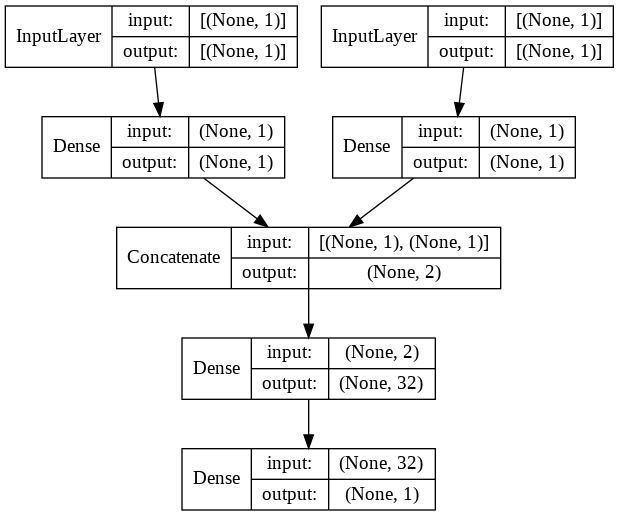

In [8]:
plot_model(model, show_shapes=True, show_layer_names=False)

# 訓練開始

In [9]:
history = model.fit([x_train1, x_train2], y_train, epochs=200)

Epoch 1/200
256/256 [==============================] - 0s 1ms/sample - loss: 0.7011 - acc: 0.5430
Epoch 2/200
256/256 [==============================] - 0s 52us/sample - loss: 0.6984 - acc: 0.5430
Epoch 3/200
256/256 [==============================] - 0s 48us/sample - loss: 0.6957 - acc: 0.5430
Epoch 4/200
256/256 [==============================] - 0s 47us/sample - loss: 0.6934 - acc: 0.5430
Epoch 5/200
256/256 [==============================] - 0s 50us/sample - loss: 0.6911 - acc: 0.5430
Epoch 6/200
256/256 [==============================] - 0s 49us/sample - loss: 0.6888 - acc: 0.5430
Epoch 7/200
256/256 [==============================] - 0s 49us/sample - loss: 0.6864 - acc: 0.5430
Epoch 8/200
256/256 [==============================] - 0s 50us/sample - loss: 0.6839 - acc: 0.5430
Epoch 9/200
256/256 [==============================] - 0s 45us/sample - loss: 0.6811 - acc: 0.5430
Epoch 10/200
256/256 [==============================] - 0s 49us/sample - loss: 0.6781 - acc: 0.5430
Epoch 11/2

# 訓練結果出力

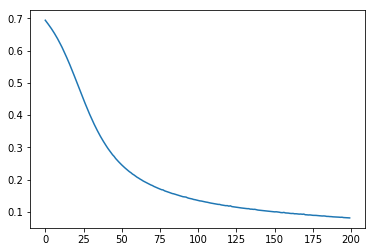

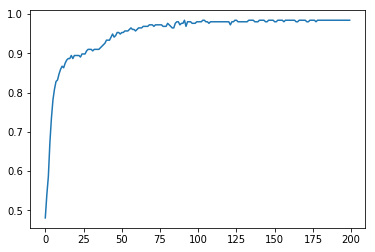

In [0]:
# loss出力
loss = history.history['loss']

plt.plot(np.arange(len(loss)), loss) # np.arangeはlossの連番数列を生成(今回はepoch数の0から29)
plt.show()

# accuracy出力
acc = history.history['acc']

plt.plot(np.arange(len(acc)), acc)
plt.show()